##  Post Test
1. Memahami dan menerapkan transformasi data.
2. Mampu menjalankan proses-proses transformasi.
3. Memahami dan menerapkan penghapusan data duplikat.
4. Memahami dan menerapkan diskritisasi pada kasus data yang sesuai.

## Data Transformasi
Data transformasi merujuk pada proses mengubah atau mengubah representasi data untuk memenuhi kebutuhan atau tujuan tertentu. Transformasi data sering digunakan dalam analisis data dan pemrosesan data untuk memperbaiki kualitas data, mengurangi noise, mengubah skala, atau mengubah distribusi data.

### Teknik dalam Transformasi data
1. Normalisasi
2. Log Transform
3. Diskritisassi/ Bucketing
4. Pengurangan Dimensi
5. Scaling
6. Encoding
7. Imputasi data yang Hilang
8. Transformasi non Linear

### Let's Code

#### 1. Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### 2. Read Files

In [2]:
df = pd.read_csv("../Wishlist Praktik/movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### 3. Basic Info

##### describe

In [3]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


##### info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


##### missing values

In [5]:
# df.isnull().mean() * 100
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

##### df.corr => menghitung korelasi antar kolom

In [6]:
df.corr()

C:\Users\whisn\AppData\Local\Temp\ipykernel_8672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


### Hapus data dupllikat

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
df[df.duplicated(subset=['budget'])]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
13,Ordinary People,R,Drama,1980,"September 19, 1980 (United States)",7.7,49000.0,Robert Redford,Judith Guest,Donald Sutherland,United States,6000000.0,54766923.0,Paramount Pictures,124.0
17,9 to 5,PG,Comedy,1980,"December 19, 1980 (United States)",6.9,29000.0,Colin Higgins,Patricia Resnick,Jane Fonda,United States,10000000.0,103300686.0,IPC Films,109.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
23,Xanadu,PG,Fantasy,1980,"August 8, 1980 (United States)",5.3,12000.0,Robert Greenwald,Richard Christian Danus,Olivia Newton-John,United States,20000000.0,22762571.0,Universal Pictures,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


##### cek duplikasi data

In [9]:
df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


### Cek Missing Value

#### row contain missing value

In [10]:
df[df.isnull().any(axis=1)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


#### total missing value

In [11]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [12]:
df.corr()

C:\Users\whisn\AppData\Local\Temp\ipykernel_8672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [13]:
(df.isnull().mean()*100).round(2)

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64

In [14]:
df = df.fillna(method='bfill')
(df.isnull().mean()*100).round(2)

name        0.00
rating      0.08
genre       0.00
year        0.00
released    0.00
score       0.00
votes       0.00
director    0.00
writer      0.00
star        0.00
country     0.00
budget      0.01
gross       0.10
company     0.00
runtime     0.00
dtype: float64

In [15]:
df[df.isnull().any(axis=1)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7660,Aloha Surf Hotel,R,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,1000000.0,NaN,Abominable Pictures,90.0
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",3.1,18.0,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",3.1,18.0,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,Cactus Blue Entertainment,90.0
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,Cactus Blue Entertainment,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,58750.0,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,120.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",5.7,7.0,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,PK 65 Films,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [16]:
df = df.dropna()
(df.isnull().mean()*100).round(2)

name        0.0
rating      0.0
genre       0.0
year        0.0
released    0.0
score       0.0
votes       0.0
director    0.0
writer      0.0
star        0.0
country     0.0
budget      0.0
gross       0.0
company     0.0
runtime     0.0
dtype: float64

### Transformasi Data

#### Diskritisasi

Diskritisasi adalah proses mengubah data kontinu menjadi data diskrit dengan mengelompokkan nilai-nilai kontinu ke dalam rentang atau interval tertentu. <br> Tujuan dari diskritisasi adalah untuk mengurangi kompleksitas data kontinu menjadi kategori atau interval yang lebih terbatas.  <br>
Contoh <br>
    <br>Dingin: < 10 derajat Celsius
    <br>Sejuk: 10-20 derajat Celsius
    <br>Hangat: 21-30 derajat Celsius
    <br>Panas: > 30 derajat Celsius

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [18]:
desc_budget = df['budget'].describe()
desc_budget

count    7.660000e+03
mean     3.223341e+07
std      3.971702e+07
min      3.000000e+03
25%      9.000000e+06
50%      1.900000e+07
75%      4.000000e+07
max      3.560000e+08
Name: budget, dtype: float64

In [19]:
def diskritisasi_budget(val):
    if val >= desc_budget["75%"]:
        return "High"
    elif val > desc_budget["50%"]:
        return "Medium-High"
    elif val > desc_budget["25%"]:
        return "Low-Medium"
    elif val <= desc_budget["mean"]:
        return 'Low'
    
df['budget_group'] = df['budget'].apply(diskritisasi_budget)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_group
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Low-Medium
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Low
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Low-Medium
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Low
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Low


#### Bucketing
Bucketing adalah proses mengelompokkan atau mempartisi nilai-nilai kontinu ke dalam beberapa interval atau bucket diskret. Hal ini dilakukan untuk mengubah data kontinu menjadi data diskret dengan tujuan untuk menyederhanakan analisis, mengurangi kompleksitas, atau mempelajari pola dalam data. <br>
Contoh : <br>
<br> Bucket 1: Usia 0-18 tahun
<br> Bucket 2: Usia 19-30 tahun
<br> Bucket 3: Usia 31-45 tahun
<br> Bucket 4: Usia 46-60 tahun
<br> Bucket 5: Usia 61-100 tahun

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7660 entries, 0 to 7659
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7660 non-null   object 
 1   rating        7660 non-null   object 
 2   genre         7660 non-null   object 
 3   year          7660 non-null   int64  
 4   released      7660 non-null   object 
 5   score         7660 non-null   float64
 6   votes         7660 non-null   float64
 7   director      7660 non-null   object 
 8   writer        7660 non-null   object 
 9   star          7660 non-null   object 
 10  country       7660 non-null   object 
 11  budget        7660 non-null   float64
 12  gross         7660 non-null   float64
 13  company       7660 non-null   object 
 14  runtime       7660 non-null   float64
 15  budget_group  7660 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 1017.3+ KB


In [21]:
def bucketing_year(val):
    if val <= 1980:
        return "X Movie"
    elif val >= 1981 and val <= 1996:
        return "Millennials Movie"
    elif val >= 1997 and val <= 2012:
        return "Z Movie"
    elif val >= 2013 and val <= 2025:
        return "Alpha Movie"

df['year_group'] = df['year'].apply(bucketing_year)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_group,year_group
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Low-Medium,X Movie
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Low,X Movie
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Low-Medium,X Movie
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Low,X Movie
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Low,X Movie


In [29]:
df['runtime'].describe()

count    7660.000000
mean      107.266188
std        18.582297
min        55.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       366.000000
Name: runtime, dtype: float64

In [26]:
def diskriting_score(val):
    if val <= 4:
        return "Bad"
    elif val >= 4 and val <= 6:
        return "Enough"
    elif val >= 6:
        return "Good"
    
df['score_group'] = df['score'].apply(diskriting_score)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_group,year_group,score_group
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Low-Medium,X Movie,Good
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Low,X Movie,Enough
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Low-Medium,X Movie,Good
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Low,X Movie,Good
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Low,X Movie,Good


In [30]:
def diskriting_runtime(val):
    if val <= 90:
        return "Short Movie"
    elif val >= 90 and val <= 180:
        return "Normal Movie"
    elif val >= 180:
        return "Long Movie"
    
df['runtime_group'] = df['runtime'].apply(diskriting_runtime)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_group,year_group,score_group,runtime_group
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Low-Medium,X Movie,Good,Normal Movie
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Low,X Movie,Enough,Normal Movie
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Low-Medium,X Movie,Good,Normal Movie
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Low,X Movie,Good,Short Movie
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Low,X Movie,Good,Normal Movie


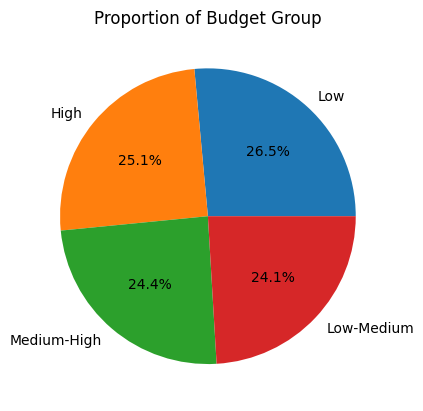

In [23]:
bg_counts = df['budget_group'].value_counts()
bg_proportions = bg_counts / len(df) * 100
bg_order = bg_proportions.sort_values(ascending=False).index

plt.pie(bg_proportions, labels=bg_order, autopct='%1.1f%%')
plt.title('Proportion of Budget Group')

plt.show()


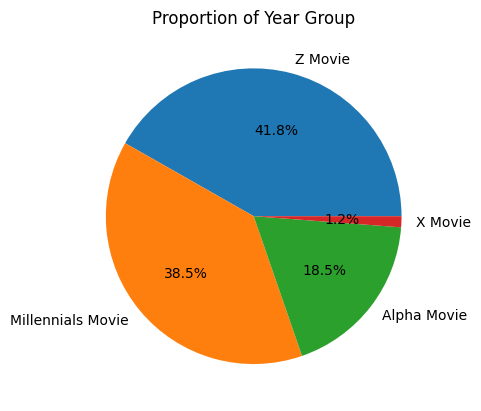

In [24]:
yg_counts = df['year_group'].value_counts()
yg_proportions = yg_counts / len(df) * 100
yg_order = yg_proportions.sort_values(ascending=False).index

plt.pie(yg_proportions, labels=yg_order, autopct='%1.1f%%')
plt.title('Proportion of Year Group')

plt.show()


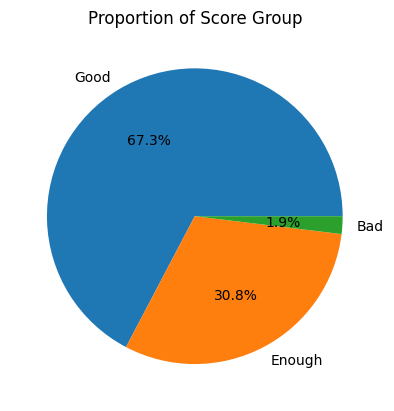

In [32]:
sg_counts = df['score_group'].value_counts()
sg_proportions = sg_counts / len(df) * 100
sg_order = sg_proportions.sort_values(ascending=False).index

plt.pie(sg_proportions, labels=sg_order, autopct='%1.1f%%')
plt.title('Proportion of Score Group')

plt.show()


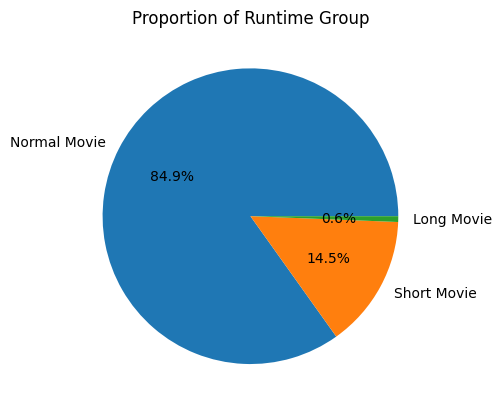

In [34]:
rt_counts = df['runtime_group'].value_counts()
rt_proportions = rt_counts / len(df) * 100
rt_order = rt_proportions.sort_values(ascending=False).index

plt.pie(rt_proportions, labels=rt_order, autopct='%1.1f%%')
plt.title('Proportion of Runtime Group')

plt.show()
